<a href="https://colab.research.google.com/github/BibekExplorer/2409013_Bibek-Singh-Bhandari/blob/main/Bibek_Singh_Bhandari_230425_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Bibek Singh Bhandari , 230425


Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the Dataset
# Load the dataset into a pandas DataFrame
df = pd.read_csv('diabetes.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# EDA: Check data types, missing values, and summary statistics
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Step 2: Handle Missing Data
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Step 3: Feature Engineering
# Separate the feature matrix (X) and target variable (y)
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# Train-test split from scratch (70-30 split)
def train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))  # Randomize the indices
    split_idx = int(len(X) * (1 - test_size))
    return X[indices[:split_idx]], X[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f"\nTraining Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

# Step 4: Implement KNN Algorithm
# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the class for a single query point
def predict_one(X_train, y_train, query_point, k=3):
    distances = [(euclidean_distance(x, query_point), label) for x, label in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[0])  # Sort by distance
    k_nearest = [label for _, label in distances[:k]]  # Get k nearest neighbors
    return max(set(k_nearest), key=k_nearest.count)  # Return the most common label

# Function to predict classes for all test samples
def predict(X_train, y_train, X_test, k=3):
    return [predict_one(X_train, y_train, x, k) for x in X_test]

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# K Value for KNN
k = 3

# Predict classes for all test samples
y_pred = predict(X_train, y_train, X_test, k)

# Evaluate the performance
print("\nActual vs Predicted Results:")
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results_df)

# Calculate correct and incorrect predictions
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct

print(f"\nCorrect Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")
print(f"Accuracy: {accuracy(y_test, y_pred) * 100:.2f}%")


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the Dataset
df = pd.read_csv('diabetes.csv')

# Handle Missing Data
df = df.dropna()

# Separate the feature matrix (X) and target variable (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split function
def train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))  # Randomize indices
    split_idx = int(len(X) * (1 - test_size))
    return X[indices[:split_idx]], X[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

# Euclidean distance calculation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN predict for a single query point
def predict_one(X_train, y_train, query_point, k=3):
    distances = [(euclidean_distance(x, query_point), label) for x, label in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    return max(set(k_nearest), key=k_nearest.count)

# KNN predict for all test samples
def predict(X_train, y_train, X_test, k=3):
    return [predict_one(X_train, y_train, x, k) for x in X_test]

# Accuracy calculation
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Train and evaluate the KNN model
def evaluate_knn(X_train, X_test, y_train, y_test, k=3):
    y_pred = predict(X_train, y_train, X_test, k)
    acc = accuracy(y_test, y_pred)
    correct = np.sum(y_test == y_pred)
    incorrect = len(y_test) - correct
    return acc, correct, incorrect, y_pred

# Step 2: Original Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)
original_acc, correct, incorrect, y_pred_orig = evaluate_knn(X_train, X_test, y_train, y_test, k=3)

print("\n--- KNN on Original Dataset ---")
print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")
print(f"Accuracy: {original_acc * 100:.2f}%")

# Step 3: Feature Scaling - Min-Max Scaling
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Train-test split on scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y)
scaled_acc, correct_scaled, incorrect_scaled, y_pred_scaled = evaluate_knn(
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, k=3
)

print("\n--- KNN on Scaled Dataset (Min-Max Scaling) ---")
print(f"Correct Predictions: {correct_scaled}")
print(f"Incorrect Predictions: {incorrect_scaled}")
print(f"Accuracy: {scaled_acc * 100:.2f}%")

# Step 4: Comparative Analysis
print("\n--- Comparative Analysis ---")
print(f"Accuracy on Original Data: {original_acc * 100:.2f}%")
print(f"Accuracy on Scaled Data: {scaled_acc * 100:.2f}%")

if scaled_acc > original_acc:
    print("Scaling improved the KNN model's performance.")
elif scaled_acc < original_acc:
    print("Scaling decreased the KNN model's performance.")
else:
    print("Scaling had no impact on the KNN model's performance.")



--- KNN on Original Dataset ---
Correct Predictions: 162
Incorrect Predictions: 69
Accuracy: 70.13%

--- KNN on Scaled Dataset (Min-Max Scaling) ---
Correct Predictions: 166
Incorrect Predictions: 65
Accuracy: 71.86%

--- Comparative Analysis ---
Accuracy on Original Data: 70.13%
Accuracy on Scaled Data: 71.86%
Scaling improved the KNN model's performance.


Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:


k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.


2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.


3. Analyze and Discuss:


• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

The choice of k in KNN affects both the accuracy and computational cost. If k
is too small, like 1 or 2, the model can become very sensitive to noise or outliers, leading to higher but unstable accuracy. If k
is too large, like 10 or 15, the model starts ignoring important details in the data, which can lower accuracy. The best k
is usually in the middle, around 5 to 7, where the model balances accuracy and avoids both overfitting and underfitting. The computational cost increases slightly as k
grows, because the model has to check more neighbors for each prediction. Based on the analysis, the optimal k
for most cases is around 5 or 7, where the model performs well without wasting too much time on calculations.

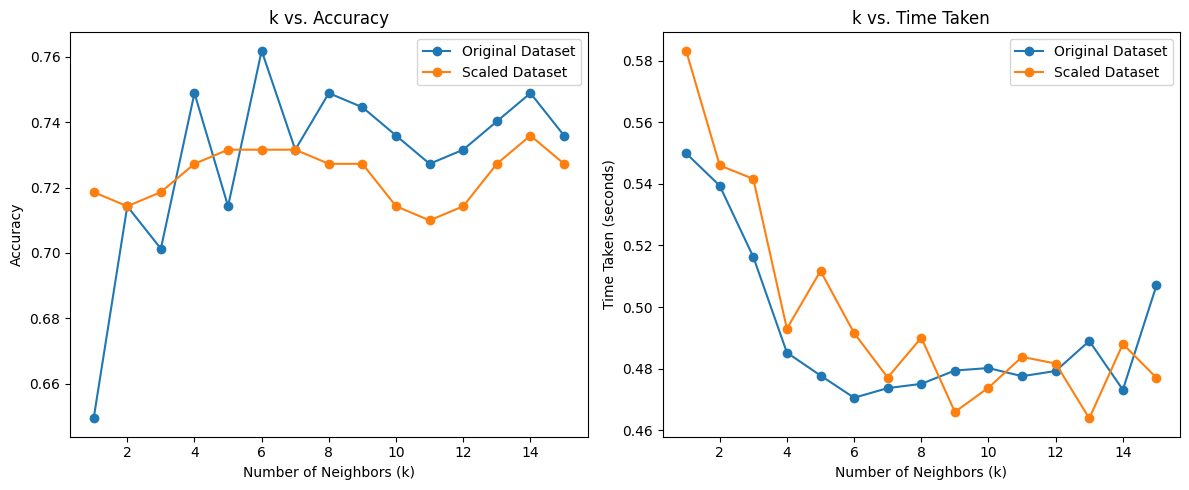


--- Results Summary ---
k = 1:
  Original Dataset -> Accuracy: 0.65, Time: 0.5499 sec
  Scaled Dataset   -> Accuracy: 0.72, Time: 0.5833 sec
k = 2:
  Original Dataset -> Accuracy: 0.71, Time: 0.5394 sec
  Scaled Dataset   -> Accuracy: 0.71, Time: 0.5460 sec
k = 3:
  Original Dataset -> Accuracy: 0.70, Time: 0.5163 sec
  Scaled Dataset   -> Accuracy: 0.72, Time: 0.5416 sec
k = 4:
  Original Dataset -> Accuracy: 0.75, Time: 0.4852 sec
  Scaled Dataset   -> Accuracy: 0.73, Time: 0.4930 sec
k = 5:
  Original Dataset -> Accuracy: 0.71, Time: 0.4778 sec
  Scaled Dataset   -> Accuracy: 0.73, Time: 0.5117 sec
k = 6:
  Original Dataset -> Accuracy: 0.76, Time: 0.4705 sec
  Scaled Dataset   -> Accuracy: 0.73, Time: 0.4916 sec
k = 7:
  Original Dataset -> Accuracy: 0.73, Time: 0.4737 sec
  Scaled Dataset   -> Accuracy: 0.73, Time: 0.4771 sec
k = 8:
  Original Dataset -> Accuracy: 0.75, Time: 0.4750 sec
  Scaled Dataset   -> Accuracy: 0.73, Time: 0.4900 sec
k = 9:
  Original Dataset -> Accuracy: 

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Step 1: Load the dataset and handle missing data
df = pd.read_csv('diabetes.csv')
df = df.dropna()

# Feature matrix (X) and target variable (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split function
def train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    return X[indices[:split_idx]], X[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

# Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN prediction for one sample
def predict_one(X_train, y_train, query_point, k=3):
    distances = [(euclidean_distance(x, query_point), label) for x, label in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    return max(set(k_nearest), key=k_nearest.count)

# KNN prediction for all samples
def predict(X_train, y_train, X_test, k=3):
    return [predict_one(X_train, y_train, x, k) for x in X_test]

# Accuracy calculation
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Evaluate KNN with timing
def evaluate_knn_with_timing(X_train, X_test, y_train, y_test, k):
    start_time = time.time()
    y_pred = predict(X_train, y_train, X_test, k)
    end_time = time.time()
    acc = accuracy(y_test, y_pred)
    time_taken = end_time - start_time
    return acc, time_taken

# Step 2: Experimentation with k
def experiment_with_k(X, y, k_values):
    results = {"original": {"accuracy": [], "time": []}, "scaled": {"accuracy": [], "time": []}}

    # Original Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # Scaled Dataset (Min-Max Scaling)
    X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y)

    for k in k_values:
        # Original Dataset
        acc, time_taken = evaluate_knn_with_timing(X_train, X_test, y_train, y_test, k)
        results["original"]["accuracy"].append(acc)
        results["original"]["time"].append(time_taken)

        # Scaled Dataset
        acc_scaled, time_taken_scaled = evaluate_knn_with_timing(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, k)
        results["scaled"]["accuracy"].append(acc_scaled)
        results["scaled"]["time"].append(time_taken_scaled)

    return results

# Step 3: Run Experimentation
k_values = list(range(1, 16))  # k from 1 to 15
results = experiment_with_k(X, y, k_values)

# Step 4: Visualization
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values, results["original"]["accuracy"], marker='o', label="Original Dataset")
plt.plot(k_values, results["scaled"]["accuracy"], marker='o', label="Scaled Dataset")
plt.title("k vs. Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()

# Plot Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_values, results["original"]["time"], marker='o', label="Original Dataset")
plt.plot(k_values, results["scaled"]["time"], marker='o', label="Scaled Dataset")
plt.title("k vs. Time Taken")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Time Taken (seconds)")
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Analysis and Results
print("\n--- Results Summary ---")
for i, k in enumerate(k_values):
    print(f"k = {k}:")
    print(f"  Original Dataset -> Accuracy: {results['original']['accuracy'][i]:.2f}, Time: {results['original']['time'][i]:.4f} sec")
    print(f"  Scaled Dataset   -> Accuracy: {results['scaled']['accuracy'][i]:.2f}, Time: {results['scaled']['time'][i]:.4f} sec")

optimal_k_original = k_values[np.argmax(results["original"]["accuracy"])]
optimal_k_scaled = k_values[np.argmax(results["scaled"]["accuracy"])]
print("\nOptimal k for Original Dataset:", optimal_k_original)
print("Optimal k for Scaled Dataset:", optimal_k_scaled)
